<h2 style="font-weight: 700; text-align: center">Depth First Search (DFS) for Graph Node Search</h2>

#### Graph Reference

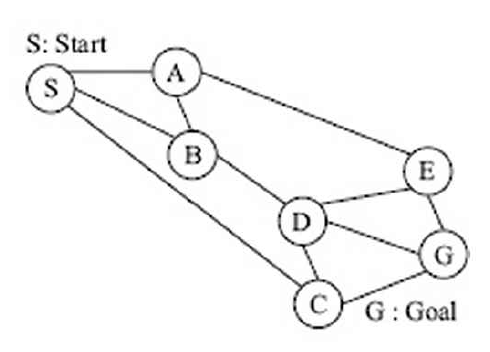

In [123]:
from IPython.display import Image, display
Image(filename="Graph_1_ref.png", width=275, height=200)

#### Graph Representation

In [124]:

#~ An unweighed undirected graph represented as a hashmap/dictionary of Parent node and connected children
graph = { "S": ["A", "B", "C"],
          "A": ["B", "E", "S"],
          "B": ["A", "D", "S"],
          "C": ["D", "G", "S"],
          "D": ["B", "C", "E", "G"],
          "E": ["A", "D", "G"],
          "G": ["C", "D", "E"]
        }

<p style="font-size: 16px">Primary data structures (OPEN and CLOSED) will work on <i>Parent-child</i> pairs(tuples)</p>

In [125]:
def make_pair(to_, from_):
  return (to_, from_)

<p style="font-size: 16px"><b>MoveGen</b> -> Generates new nodes and moves the process of searching forward</p>

In [126]:
def dfs_move_gen(graph, curr):
  new_nodes = [make_pair(new, curr) for new in graph[curr][::-1]]     
  # new_nodes = [make_pair(new, curr) for new in graph[curr]]         # DFS highly depends on the "first direction" of traversal, it does not always guarantee an optimal path
  return new_nodes

<p style="font-size: 16px"><b>Remove seen</b> -> Avoids repeat traversals and infinite looping (Simple Search 3's improvement upon SS2)</p>

###### Remove_seen checks *both* the *CLOSED* and *OPEN* lists in DFS

In [127]:
def dfs_remove_seen(new_nodes, OPEN, CLOSED):
  cleansed = []
  OPEN_ = [n[0] for n in OPEN]        # only the children, not the whole pair 
  CLOSED_ = [n[0] for n in CLOSED]
  for node in new_nodes:
    if node[0] not in OPEN_ and node[0] not in CLOSED_:   # if and only if the new node is not already in OPEN and CLOSED, add it
      cleansed.append(node)
  return cleansed

<p style="font-size: 16px"><b>Reconstruct path</b> -> When Goal node is found, this functions returns the exact path taken to reach to it</p>

In [128]:
def reconstruct_path(OPEN, CLOSED):
  path = [OPEN.pop(0)]
  node = path[0]

  while node[1] != "NIL":
    for m in CLOSED:
      if node[1] == m[0]:
        path.append(m)
        node = m
  return path

<p style="font-size: 16px"><b>Print path</b> -> Utility function to print the final path prettily</p>

In [129]:
def print_path(path):
  for node_ix in range(len(path)):
    if node_ix != len(path) - 1:
      print(f"\033[38;5;214m{path[node_ix][0]}", end="\033[38;5;207m -> \033[0m")
    else:  
      print(f"\033[38;5;214m{path[node_ix][0]}")

<p style="font-size: 20px"><b>Core working function</b></p>

In [130]:
def graph_dfs(graph, start, goal):
  OPEN = [make_pair(start, "NIL")]
  CLOSED = []
  
  while len(OPEN) != 0:
    if OPEN[0][0] == goal:
      print("Path from Source to Goal:", end=" ")
      print_path(reconstruct_path(OPEN, CLOSED)[::-1])
      return
    else:
      CLOSED.append(OPEN.pop(0))
      new_nodes = dfs_move_gen(graph, CLOSED[-1][0])
      new_nodes = dfs_remove_seen(new_nodes, OPEN, CLOSED)
      [(OPEN.insert(0, i)) for i in new_nodes]        # Stack implementation of OPEN in DFS
  print("\033[38;5;197mGoal not found...\033[0m")

<p style="font-size: 20px">Function Calls</p>

<p style="font-size: 16px"><b>For the graph set above ↑</b></p>

<p style="font-size: 16px">Case 1: Simple <b>Start (S)</b> to <b>Goal (G)</b> searching</p>

In [131]:
graph_dfs(graph, "S", "G")

Path from Source to Goal: S -> A -> E -> G


<p style="font-size: 16px">Case 2: Goal is not present</p>

In [132]:
graph_dfs(graph, "A", "H")

Goal not found...


<p style="font-size: 16px">Case 3: Begins with Goal itself</p>

In [133]:
graph_dfs(graph, "G", "G")

Path from Source to Goal: G


<p style="font-weight: 700; font-size: 16px">Graph 2 - Semi Directed</p>

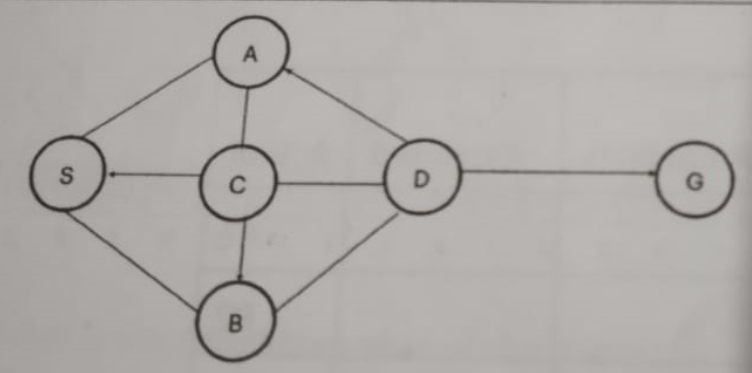

In [134]:
Image(filename="Graph_2_ref.png", width=400, height=200)

In [135]:
graph = { "S": ["A", "B"],
          "A": ["C", "S"],
          "B": ["D", "S"],
          "C": ["A", "B", "D", "S"],
          "D": ["A", "B", "C", "G"],
          "G": []
        }

<p style="font-size: 16px">Case 1: Simple <b>Start (S)</b> to <b>Goal (G)</b> searching</p>

In [141]:
graph_dfs(graph, "S", "G")

Path from Source to Goal: S -> A -> C -> D -> G
